In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
#.csv loader
def load_csv_data(path =  "notebook/datasets/DP_LIVE_21112022133845200.csv"):
    data = pd.read_csv(path)
    return data

In [66]:
#inflation data
inflation_data = load_csv_data()

In [19]:
#commodities price data
commodity_data = load_csv_data("notebook/datasets/commodity 2000-2022.csv")

In [111]:
#extract g-20 inflation data within relevant time interval
def get_location_data(data, loc = 'G-20'):
    new_data = data[data["LOCATION"] == loc]
    new_data = new_data[new_data["TIME"] <= "2021-08"]
    return new_data

In [112]:
#extract the relevant columns from inflation data
def extract_time_value(data):
    return data[["TIME", "Value"]].reset_index(drop = True)

In [144]:
#extract relevant time interval from commodity data and adjust month column to make it compatable with inflation data
def get_relevant_time(data):
    data = data[data["Month"] >= "2018-05-01"]
    data["Month"] = data["Month"].str[0:7]
    data = data.reset_index(drop = True)
    return data

In [113]:
#plot time vs inflation
def plot_time_vs_inflation_G20(data):
    fig = plt.figure(figsize=(20,5))
    plt.plot(data["TIME"], data["Value"], label = "Inflation of G-20 countries")
    plt.xticks(rotation = 45)
    plt.legend(loc = 'upper left')
    plt.show()
    #fig.savefig("notebook/plots/Time_vs_InflationG20")

In [152]:
#plot time vs chosen commodity price
def plot_time_vs_commodity_price(data, commodity):
    fig = plt.figure(figsize=(20,5))
    plt.plot(data["Month"], data[commodity], label = "Price of " + commodity)
    plt.xticks(rotation = 45)
    plt.legend(loc = 'upper left')
    plt.show()
    #fig.savefig("notebook/plots/Time_vs_Price_"+commodity)

In [115]:
g20_data = get_location_data(inflation_data)

In [116]:
g20_data = extract_time_value(g20_data)

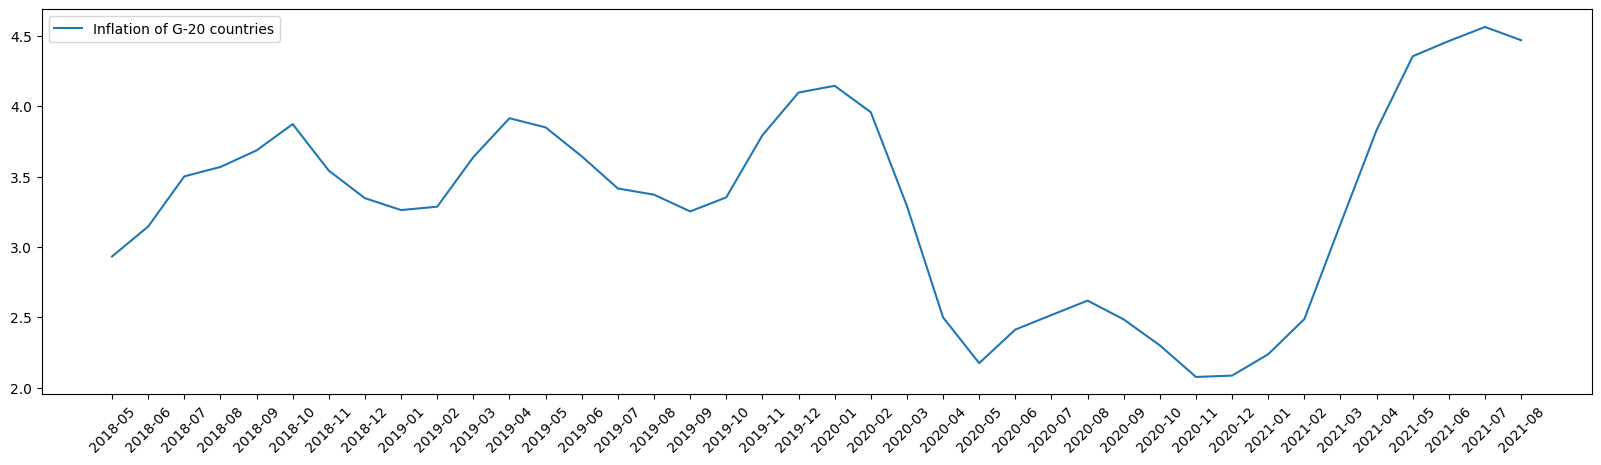

In [117]:
plot_time_vs_inflation_G20(g20_data)

In [145]:
commodity_data = load_csv_data("notebook/datasets/commodity_prices_august_2021.csv")

In [ ]:
commodity_data = get_relevant_time(commodity_data)

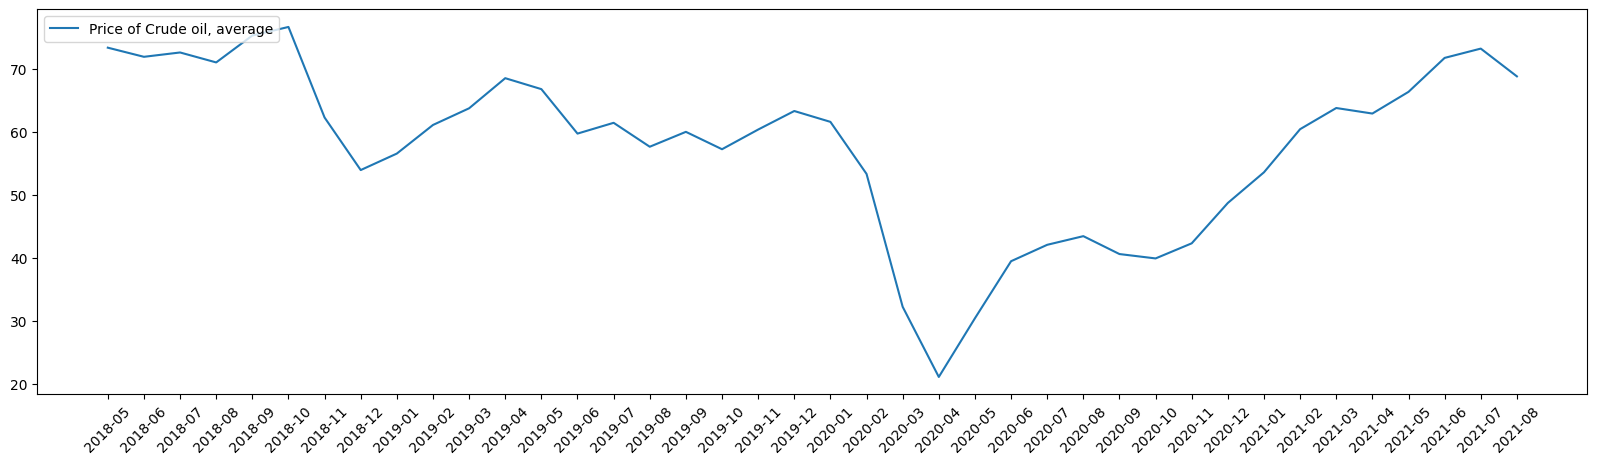

In [153]:
plot_time_vs_commodity_price(commodity_data, "Crude oil, average")

In [151]:
commodity_data

,Month,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South African","Natural gas, US","Natural gas, Europe","Liquefied natural gas, Japan",...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
0,2018-05,73.430000,76.65,73.66,69.98,105.29,101.89,2.7972,7.487354,10.251517,...,2299.67,66.10,6825.27,2360.93,20858.83,14366.49,3059.87,1303.45,904.73,16.490
1,2018-06,71.976667,75.19,73.22,67.52,114.33,103.88,2.9523,7.448943,10.442988,...,2237.62,65.04,6965.86,2436.29,20660.52,15105.65,3088.57,1281.57,884.90,16.541
2,2018-07,72.666667,74.44,72.72,70.84,119.57,106.02,2.8251,7.598839,10.440797,...,2082.24,64.56,6250.75,2207.02,19729.80,13793.86,2656.13,1237.71,832.00,15.723
3,2018-08,71.083333,73.13,72.13,67.99,117.34,98.48,2.9572,8.084910,10.875000,...,2051.51,67.15,6051.05,2053.53,19228.77,13411.35,2512.00,1201.71,804.91,14.987
4,2018-09,75.363333,78.86,77.02,70.21,114.16,102.14,2.9847,9.521577,11.303317,...,2026.46,68.44,6050.76,2022.91,18967.13,12510.35,2434.68,1198.39,804.79,14.272
5,2018-10,76.726667,80.47,78.96,70.75,108.73,100.34,3.2840,8.790961,11.660580,...,2029.86,73.41,6219.59,1987.55,19121.48,12314.91,2673.67,1215.39,829.87,14.597
6,2018-11,62.316667,65.17,65.11,56.67,100.73,91.58,4.1293,8.265079,11.700295,...,1938.51,73.26,6195.92,1937.11,19064.86,11239.72,2595.69,1220.65,846.19,14.353
7,2018-12,53.960000,56.46,56.47,48.95,101.37,95.41,3.9825,7.976242,11.995321,...,1920.38,69.16,6075.32,1972.32,19259.58,10835.08,2616.29,1250.40,791.16,14.772
8,2019-01,56.583333,59.27,58.96,51.52,98.56,91.29,3.0725,7.262343,12.007293,...,1853.72,76.16,5939.10,1997.14,20457.75,11523.09,2569.70,1291.75,806.77,15.624
9,2019-02,61.133333,64.13,64.32,54.95,95.42,84.16,2.7066,6.005797,11.806582,...,1862.99,88.22,6300.49,2062.79,21263.95,12685.23,2707.19,1320.07,818.15,15.815
